In [12]:
%matplotlib inline

%load_ext autoreload
%autoreload 1

import numpy as np
import matplotlib.pyplot as plt

%aimport detectors

API PDB-C164 disc. PIN
  QE = 81.3 %
  Resp. = 0.43 A/W
  Dark current (total or vol.) = 1.000 nA
Hamm S13620 8x8 PIN
  QE = 88.8 %
  Resp. = 0.47 A/W
  Dark current (total or vol.) = 0.300 nA
Hamm S8550 4x8 APD
  QE = 85.0 %
  Resp. = 0.45 A/W
  Dark current (total or vol.) = 1.000 nA
  Noise figure = 0.200
  Noise factor = 1.047
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


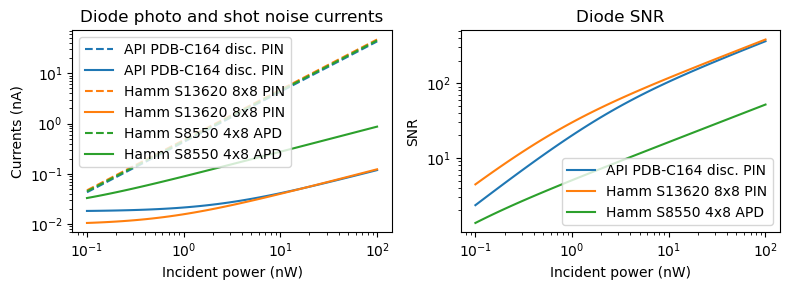

In [15]:
diodes = detectors.diodes

p_incident = np.geomspace(0.1,100)  # incident pwoer on log scale [nW]
bw = 1e6
t = 20

fig, axes = plt.subplots(1, 2, figsize=(4*2,3*1), dpi=100)
for i, diode in enumerate(diodes.values()):
    plt.sca(axes.flat[0])
    plt.plot(p_incident, diode.photocurrent(p_inc=p_incident)*1e9/diode.gain, 
        '--', label=diode.name, color=f'C{i}')
    plt.plot(p_incident, diode.shot_noise_current(p_inc=p_incident, bw=bw, t=t)*1e9/diode.gain, 
        '-', label=diode.name, color=f'C{i}')
    plt.title('Diode photo and shot noise currents')
    plt.ylabel('Currents (nA)')
    plt.sca(axes.flat[1])
    plt.plot(p_incident, diode.SNR(p_inc=p_incident, bw=bw, t=t), 
        label=diode.name, color=f'C{i}')
    plt.title('Diode SNR')
    plt.ylabel('SNR')
for ax in axes.flat:
    plt.sca(ax)
    plt.xlabel('Incident power (nW)')
    plt.yscale('log')
    plt.xscale('log')
    plt.legend()
plt.tight_layout()